## Demontration of Hopfield Networks for information retrieval of distorted images
partly adapted from http://codeaffectionate.blogspot.co.at/2013/05/fun-with-hopfield-and-numpy.html which shows a different version

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
A = """
.XXX.
X...X
XXXXX
X...X
X...X
"""
 
Z = """
XXXXX
...X.
..X..
.X...
XXXXX
"""


X = """
X...X
.X.X.
..X..
.X.X.
X...X
"""

Define functions to plot patterns

In [2]:
def to_pattern(letter):
    return np.array([+1 if c=='X' else -1 for c in letter.replace('\n','')])

In [3]:
import pylab as plt
import numpy as np
def display(patterns):
    from pylab import imshow, cm, show
    plt.subplot(1, 3, 1)
    p0=imshow(patterns[0].reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    plt.subplot(1, 3, 2)
    p1=imshow(patterns[1].reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    plt.subplot(1, 3, 3)
    p2=imshow(patterns[2].reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    plt.show()
    

In [4]:
patterns = np.array([to_pattern(A), to_pattern(Z), to_pattern(X)])
#display(patterns)

Training = set weights

In [5]:
def train(patterns):
    from numpy import zeros, outer, diag_indices 
    r,c = patterns.shape
    W = zeros((c,c))
    for p in patterns:
        W = W + outer(p,p)
    W[diag_indices(c)] = 0
    return W/r

In [6]:
w=train(patterns)
#print w

Calculate energy of given pattern.

In [7]:
e=[]
def energy(W,patterns):
    e0=e1=e2=0
    for i, j in np.ndindex((25,25)):
        e0+=-0.5*patterns[0][i]*patterns[0][j]*W[i][j]
        e1+=-0.5*patterns[1][i]*patterns[1][j]*W[i][j]
        e2+=-0.5*patterns[2][i]*patterns[2][j]*W[i][j]
        #print e0
    e.append([e0,e1,e2])
    return e


Set number of steps = number of updates of the patterns.

In [8]:
from numpy import vectorize, dot
def recall(W, patterns, steps=200):
    for step in xrange(steps):        
        flag=0
        for p in patterns:
            rnd=np.random.randint(25)
            s=dot(p,W[rnd])        
            tmp=p[rnd]
            if s>0:                                          #all thresholds set to zero
                p[rnd]=1
            else:
                p[rnd]=-1 
            #print "chosen pixel: ",rnd, ", node sum: ",s
            if(tmp!=p[rnd]):                                  #detect if smthg changed     
                flag=1
        if (flag):                                            #only show output if smthg changed
            print "Step: ",step
            display(patterns)
        energy(W,patterns)
    return patterns

Set disortion parameter "pr" = probability that pixel remains undistorted.

In [9]:
pr=0.8

distA=np.random.choice(2, 25, p=[pr,1-pr])
print distA
distZ=np.random.choice(2, 25, p=[pr,1-pr])
print distZ
distX=np.random.choice(2, 25, p=[pr,1-pr])
print distX

dists= np.array([distA,distZ,distX])

[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0]
[0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
[1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0]


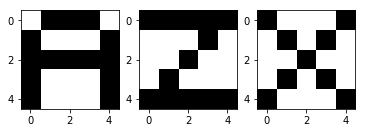

In [10]:
display(patterns)
#print dist_patterns[0]

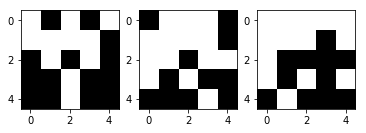

In [11]:
dist_patterns = patterns + 2*dists*(-np.abs(patterns)/patterns)

display(dist_patterns)

Step:  1


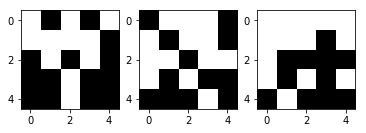

Step:  2


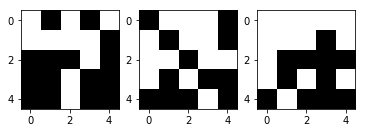

Step:  3


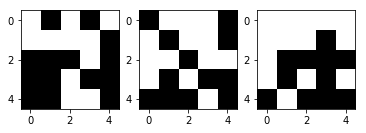

Step:  4


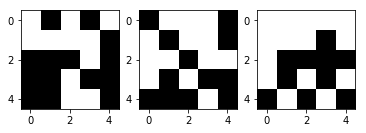

Step:  5


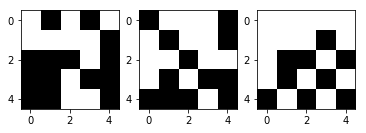

Step:  6


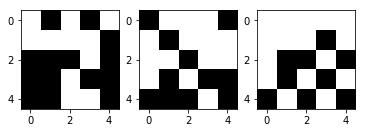

Step:  7


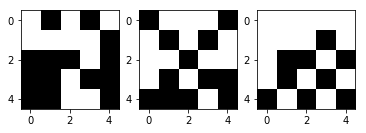

Step:  8


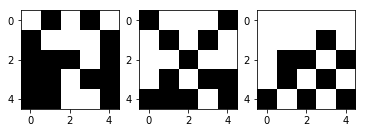

Step:  9


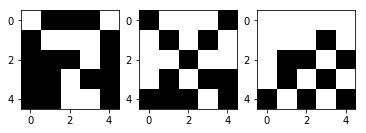

Step:  10


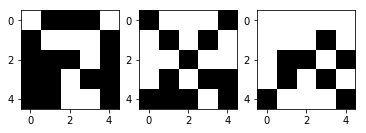

Step:  13


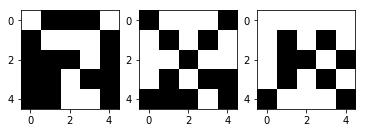

Step:  14


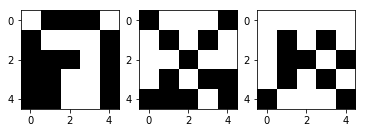

Step:  15


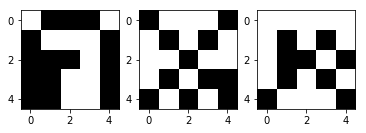

Step:  23


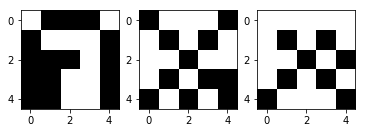

Step:  25


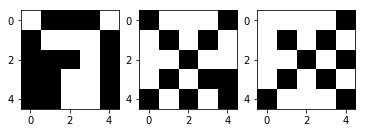

Step:  28


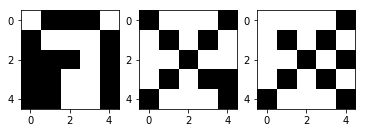

Step:  33


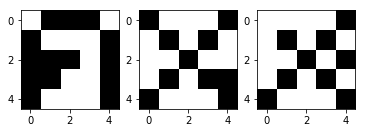

Step:  39


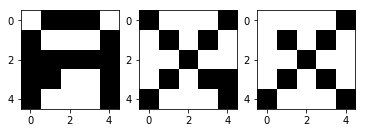

Step:  51


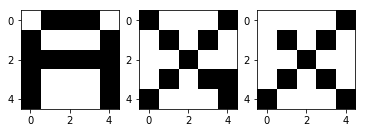

Step:  55


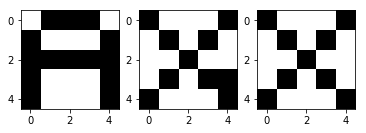

Step:  58


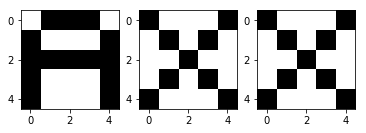

In [12]:
rec_patterns=recall(w,dist_patterns)

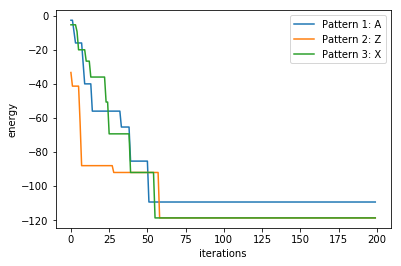

In [13]:
plt.plot(np.asarray(e)[:,0],label='Pattern 1: A')
plt.plot(np.asarray(e)[:,1],label='Pattern 2: Z')
plt.plot(np.asarray(e)[:,2],label='Pattern 3: X')
plt.xlabel("iterations")
plt.ylabel("energy")
plt.legend();